In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import glob
import warnings
warnings.filterwarnings('ignore')

In [3]:
ticker_price_moment_exit = pd.read_hdf("ticker_price_moment_exit.hd5")
ticker_price_moment_exit.info()
ticker_price_moment_exit.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52622 entries, 0 to 54760
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticker         52622 non-null  object
 1   bidPrice       52622 non-null  object
 2   bidSize        52622 non-null  object
 3   askPrice       52622 non-null  object
 4   askSize        52622 non-null  object
 5   lastUpdated    52622 non-null  object
 6   lastSalePrice  52622 non-null  object
 7   lastSaleSize   52622 non-null  object
 8   lastSaleTime   52622 non-null  object
 9   volume         52622 non-null  object
 10  current_price  52622 non-null  object
 11  timestamp      52622 non-null  object
 12  news_id        52622 non-null  object
dtypes: object(13)
memory usage: 5.6+ MB


,ticker,bidPrice,bidSize,askPrice,askSize,lastUpdated,lastSalePrice,lastSaleSize,lastSaleTime,volume,current_price,timestamp,news_id
0,VS,0.0,0.0,0.0,0.0,1629316800000.0,4.33,6.0,1629316790023,46.0,4.24,1629716406,0000d467d1a52a6a84fc8b30adbe8ec2
1,VSSYW,0.0,0.0,0.0,0.0,1628193600000.0,1.55,25.0,1628178157384,25.0,2.08,1629716406,0000d467d1a52a6a84fc8b30adbe8ec2
3,BTBT,0.0,0.0,0.0,0.0,1632513600000.0,9.44,1.0,1632513582057,38333.0,9.46,1632747622,0007ea6c22fc24e1f34021185ad07e4e
4,CAN,0.0,0.0,0.0,0.0,1632515322537,6.16,80.0,1632514484013,453506.0,6.11,1632747622,0007ea6c22fc24e1f34021185ad07e4e
5,HVBT,0.0,0.0,0.0,0.0,1631563200000.0,3.06,300.0,1631563186154,33347.0,3.06,1632747622,0007ea6c22fc24e1f34021185ad07e4e
6,OLB,0.0,0.0,0.0,0.0,1632513600000.0,4.23,100.0,1632513598460.0,3823.0,4.25,1632747622,0007ea6c22fc24e1f34021185ad07e4e
7,BBBY,0.0,0.0,0.0,0.0,1631649600272,23.82,6.0,1631649599149,62985.0,23.83,1631707209,00091f238ca72bd41d8baf14eb089f51
8,KFS,0.0,0.0,0.0,0.0,1633118400000.0,5.17,100.0,1633096381737,300.0,5.36,1633350615,000987a19572364448369fdaaf5d7d20
9,AFRM,0.0,0.0,0.0,0.0,1632254400987,108.105,28.0,1632254395027,189948.0,108.11,1632315622,000cd8ff9081aaf24065fa357b186b02
10,NATR,0.0,0.0,17.45,133.0,1630504790206,17.33,100.0,1630504717922,140.0,17.33,1630504816,000de19c850fb98b434e5adf871f6618


In [5]:
scores_retrotesting = pd.read_hdf("scores_retrotesting.hd5")
print(scores_retrotesting["final_score"].min()) ##данные от -14 до 5 - очень странная расбалансировка
print(scores_retrotesting["final_score"].max())
scores_retrotesting = scores_retrotesting[scores_retrotesting['final_score'] >3 ]


scores_retrotesting.info()
scores_retrotesting.head(10)

-14.254609683811694
5.159715890644274
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 77 to 35677
Data columns (total 8 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   observation_id                                       80 non-null     int64  
 1   news_id                                              80 non-null     object 
 2   10_True_0.05                                         80 non-null     float64
 3   ticker                                               80 non-null     object 
 4   final_score                                          80 non-null     float64
 5   final_probabilities                                  80 non-null     float64
 6   probability_of_conversion_calibrated_by_source.name  80 non-null     float64
 7   probability                                          80 non-null     float64
dtypes: float64(5), int64(1), object

,observation_id,news_id,10_True_0.05,ticker,final_score,final_probabilities,probability_of_conversion_calibrated_by_source.name,probability
77,2640,1256a14eb635a4d5ce7265db89b17e1a,0.0,GP,3.602661,0.973472,0.263349,0.247648
274,8648,3d0d5cf485f830a3f504939507835c04,0.0,AEY,3.062563,0.955322,0.231295,0.209504
365,11149,4e1c384c5bc07bc25d34dedb71549b1f,0.0,VTSI,3.987785,0.981797,0.293361,0.277548
539,16862,76192c3f79fd20595a9789299fc05c5a,0.0,XSPA,3.027966,0.953822,0.229162,0.207214
678,22025,9a3f60abf541b9844120b280b85b4c2b,0.0,DSP,3.433080,0.968723,0.255003,0.235189
687,22499,9dbc000e6a6967e7d644af8bcb8cee2a,0.0,EVOL,3.875282,0.979673,0.285313,0.268588
749,24118,a90f42357d3174a3b8236e3d9e6cc693,1.0,CYBR,3.669652,0.975148,0.234024,0.252691
903,28644,c9f9ac52368334f51dcb49d928c12776,1.0,CASI,3.437561,0.968858,0.252667,0.235512
1025,32366,e3d59c6cf70deadd4126a7ed9cdc4d1b,0.0,AZEK,3.777544,0.977633,0.240732,0.260953
1040,32870,e71fdbb8d05e33d248641d74ce3751af,0.0,EMAN,3.508962,0.970942,0.260051,0.240710


In [7]:

all_files = glob.glob("2021-08-13.hd5")
li = []
#print(all_files)
for filename in all_files:
    df = pd.read_hdf(filename, index_col=None, header=0)
    li.append(df)

intraday = pd.concat(li, axis=0, ignore_index=True)
#intraday =pd.read_hdf('./test/intraday_data/2021-08-13.hd5')
intraday.info()
intraday.tail(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431827 entries, 0 to 431826
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype                  
---  ------         --------------   -----                  
 0   open           431827 non-null  float64                
 1   high           225941 non-null  float64                
 2   close          431827 non-null  float64                
 3   low            225941 non-null  float64                
 4   volume         225941 non-null  float64                
 5   time           431827 non-null  int64                  
 6   formated time  431827 non-null  datetime64[ns, tzutc()]
 7   ticker         431827 non-null  object                 
 8   autofilled     431827 non-null  bool                   
dtypes: bool(1), datetime64[ns, tzutc()](1), float64(5), int64(1), object(1)
memory usage: 26.8+ MB


,open,high,close,low,volume,time,formated time,ticker,autofilled
431797,53.810,53.8100,53.805,53.7800,1787.0,1628883060,2021-08-13 19:31:00+00:00,EYE,False
431798,53.805,53.8050,53.730,53.7100,1660.0,1628883120,2021-08-13 19:32:00+00:00,EYE,False
431799,53.725,53.7800,53.780,53.6900,3175.0,1628883180,2021-08-13 19:33:00+00:00,EYE,False
431800,53.760,53.7900,53.770,53.7502,1884.0,1628883240,2021-08-13 19:34:00+00:00,EYE,False
431801,53.750,53.7500,53.740,53.7200,444.0,1628883300,2021-08-13 19:35:00+00:00,EYE,False
431802,53.740,53.7700,53.770,53.7100,444.0,1628883360,2021-08-13 19:36:00+00:00,EYE,False
431803,53.740,53.7800,53.780,53.7400,1657.0,1628883420,2021-08-13 19:37:00+00:00,EYE,False
431804,53.775,53.7750,53.775,53.7750,220.0,1628883480,2021-08-13 19:38:00+00:00,EYE,False
431805,53.790,53.8400,53.780,53.7800,3024.0,1628883540,2021-08-13 19:39:00+00:00,EYE,False
431806,53.800,53.8000,53.795,53.7700,1780.0,1628883600,2021-08-13 19:40:00+00:00,EYE,False


In [8]:
def profit(in_money,data,time_new_out,time_in,time_out):
    t1 = time_new_out+time_in*60
    t1 = t1 - (t1 % 60)
    t_in = data[data["time"]==t1]

    if( t_in.empty):
        return 0
    stock = in_money/t_in["close"].values[0]
    t2 = (time_new_out + time_out*60)
    t2 = t2 - (t2 % 60)
    t_out = data[data["time"]== t2]
    if(t_out.empty):
        return 0
    result = stock*(t_out["close"].values[0])
    #print(result - in_money)
    return (result - in_money)/(in_money)*100
    
    

In [9]:
profits  = np.zeros((6,6))

print(profit)
in_time  = [0,1,2,3,4,5] #uniq
out_time = [1,2,5,10,15,20] #uniq

<function profit at 0x000002A9838FC798>


In [10]:

for ind,data in scores_retrotesting.iterrows() :
   # print(data["news_id"],data["ticker"])
    buf = ticker_price_moment_exit[ticker_price_moment_exit["ticker"] == data["ticker"]]
    buf =  buf[buf["news_id"]==data["news_id"]]
    # для всех найдейных 
    if(not buf.empty):
        intraday2 = intraday[intraday['ticker'] == buf["ticker"].values[0] ]
        if(not intraday2.empty):
            for i in in_time:
                for j in out_time :
                    if(i<=j):
                        profits[in_time.index(i)][out_time.index(j)] += profit(1000,intraday2,buf["timestamp"].values[0],i,j)
                
        

0.0


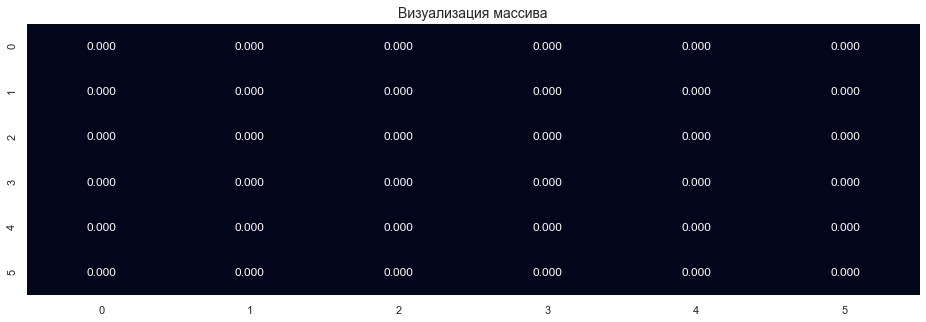

In [21]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(16, 5))
ax = sns.heatmap(profits, annot=True, fmt=".3f", cbar=None)
plt.title("Визуализация массива",fontsize=14)
print(profits[1][1])
№plt.savefig("visualize_numpy_array.png", bbox_inches='tight', dpi=100)

plt.show()

In [12]:


for ind,data in scores_retrotesting.iterrows():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-12-103f9f9be799>, line 2)

In [ ]:
## второй этап

In [14]:
scores_retrotesting = pd.read_hdf("scores_retrotesting.hd5")
scores_retrotesting = scores_retrotesting[scores_retrotesting['final_score'] >3 ]
scores_retrotesting.head(5)

,observation_id,news_id,10_True_0.05,ticker,final_score,final_probabilities,probability_of_conversion_calibrated_by_source.name,probability
77,2640,1256a14eb635a4d5ce7265db89b17e1a,0.0,GP,3.602661,0.973472,0.263349,0.247648
274,8648,3d0d5cf485f830a3f504939507835c04,0.0,AEY,3.062563,0.955322,0.231295,0.209504
365,11149,4e1c384c5bc07bc25d34dedb71549b1f,0.0,VTSI,3.987785,0.981797,0.293361,0.277548
539,16862,76192c3f79fd20595a9789299fc05c5a,0.0,XSPA,3.027966,0.953822,0.229162,0.207214
678,22025,9a3f60abf541b9844120b280b85b4c2b,0.0,DSP,3.433080,0.968723,0.255003,0.235189


In [15]:
ticker_price_moment_exit = pd.read_hdf("ticker_price_moment_exit.hd5")
ticker_price_moment_exit.info()
ticker_price_moment_exit.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52622 entries, 0 to 54760
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticker         52622 non-null  object
 1   bidPrice       52622 non-null  object
 2   bidSize        52622 non-null  object
 3   askPrice       52622 non-null  object
 4   askSize        52622 non-null  object
 5   lastUpdated    52622 non-null  object
 6   lastSalePrice  52622 non-null  object
 7   lastSaleSize   52622 non-null  object
 8   lastSaleTime   52622 non-null  object
 9   volume         52622 non-null  object
 10  current_price  52622 non-null  object
 11  timestamp      52622 non-null  object
 12  news_id        52622 non-null  object
dtypes: object(13)
memory usage: 5.6+ MB


,ticker,bidPrice,bidSize,askPrice,askSize,lastUpdated,lastSalePrice,lastSaleSize,lastSaleTime,volume,current_price,timestamp,news_id
0,VS,0.0,0.0,0.0,0.0,1629316800000.0,4.33,6.0,1629316790023,46.0,4.24,1629716406,0000d467d1a52a6a84fc8b30adbe8ec2
1,VSSYW,0.0,0.0,0.0,0.0,1628193600000.0,1.55,25.0,1628178157384,25.0,2.08,1629716406,0000d467d1a52a6a84fc8b30adbe8ec2
3,BTBT,0.0,0.0,0.0,0.0,1632513600000.0,9.44,1.0,1632513582057,38333.0,9.46,1632747622,0007ea6c22fc24e1f34021185ad07e4e
4,CAN,0.0,0.0,0.0,0.0,1632515322537,6.16,80.0,1632514484013,453506.0,6.11,1632747622,0007ea6c22fc24e1f34021185ad07e4e
5,HVBT,0.0,0.0,0.0,0.0,1631563200000.0,3.06,300.0,1631563186154,33347.0,3.06,1632747622,0007ea6c22fc24e1f34021185ad07e4e
6,OLB,0.0,0.0,0.0,0.0,1632513600000.0,4.23,100.0,1632513598460.0,3823.0,4.25,1632747622,0007ea6c22fc24e1f34021185ad07e4e
7,BBBY,0.0,0.0,0.0,0.0,1631649600272,23.82,6.0,1631649599149,62985.0,23.83,1631707209,00091f238ca72bd41d8baf14eb089f51
8,KFS,0.0,0.0,0.0,0.0,1633118400000.0,5.17,100.0,1633096381737,300.0,5.36,1633350615,000987a19572364448369fdaaf5d7d20
9,AFRM,0.0,0.0,0.0,0.0,1632254400987,108.105,28.0,1632254395027,189948.0,108.11,1632315622,000cd8ff9081aaf24065fa357b186b02
10,NATR,0.0,0.0,17.45,133.0,1630504790206,17.33,100.0,1630504717922,140.0,17.33,1630504816,000de19c850fb98b434e5adf871f6618


In [16]:
def max_profit(data,time_new_out,interval):
    max_diff = 0
    t1 = time_new_out
    t1 = t1 - (t1 % 60)
    t_in = data[data["time"]==t1]
    for i in range(interval):
        t2 = (t1 + i*60)
        t_out = data[data["time"]== t2]
        buf = abs(t_in['close'].values[0] - t_out['close'].values[0])/ t_out['close'].values[0]
        if(max_diff < buf):
            max_diff = buf
    return max_diff
    

In [17]:
distribution = []
for ind,data in scores_retrotesting.iterrows() :
   # print(data["news_id"],data["ticker"])
    buf = ticker_price_moment_exit[ticker_price_moment_exit["ticker"] == data["ticker"]]
    buf =  buf[buf["news_id"]==data["news_id"]]
    # для всех найдейных 
    if(not buf.empty):
        intraday2 = intraday[intraday['ticker'] == buf["ticker"].values[0] ]
        if(not intraday2.empty):
            distribution.append(max_profit(intraday2,buf['timestamp'].values[0],10))

IndexError: index 0 is out of bounds for axis 0 with size 0

0


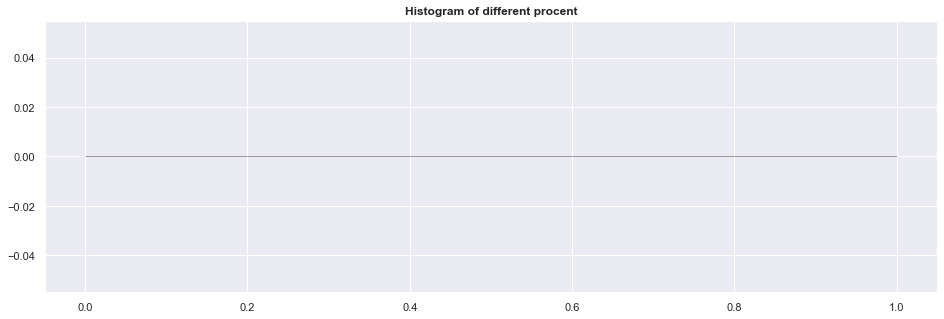

In [18]:
print(len(distribution))
fig = plt.figure(figsize=(16, 5))

sns.distplot(distribution, hist=True, kde=False, 
             bins=30,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title("Histogram of different procent", weight="bold")

plt.show()

In [19]:
for i in range(len(distribution)):
    if(distribution[i] >= 0.05):
        distribution[i] = 1
    else:
        distribution[i] = 0

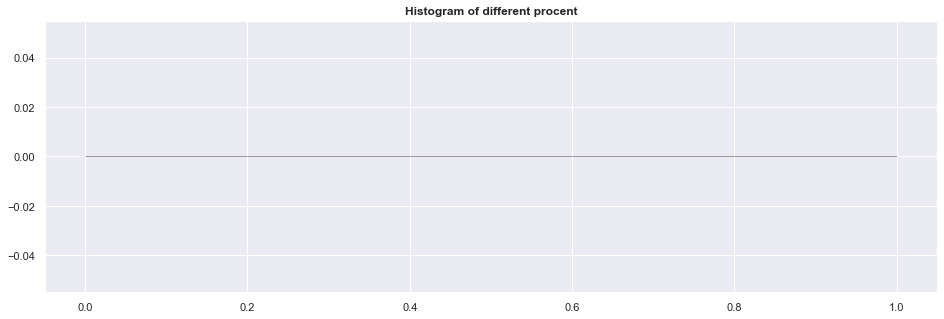

In [20]:
fig = plt.figure(figsize=(16, 5))

sns.distplot(distribution, hist=True, kde=False, 
             bins=30,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title("Histogram of different procent", weight="bold")

plt.show()